In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,optimizers
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [2]:
#loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [4]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [6]:
model = Sequential()

model.add(conv_base)  # Assuming base_model is your VGG16 without top layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for CIFAR-10


In [7]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [10]:
history = model.fit(train_images,train_labels,epochs=50,validation_data=(test_images,test_labels),callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 27s 18ms/step - loss: 1.2873 - accuracy: 0.5564 - val_loss: 0.9993 - val_accuracy: 0.6500
Epoch 2/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0152 - accuracy: 0.6518 - val_loss: 0.8889 - val_accuracy: 0.6929
Epoch 3/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9014 - accuracy: 0.6904 - val_loss: 0.8374 - val_accuracy: 0.7081
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8268 - accuracy: 0.7159 - val_loss: 0.8137 - val_accuracy: 0.7168
Epoch 5/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7711 - accuracy: 0.7342 - val_loss: 0.7922 - val_accuracy: 0.7259
Epoch 6/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7230 - accuracy: 0.7535 - val_loss: 0.7544 - val_accuracy: 0.7366
Epoch 7/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6756 - accuracy: 0.7670 - val_loss: 0.7620 -

In [13]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.8186 - accuracy: 0.7498
Test Loss: 0.8185965418815613
Test Accuracy: 0.7498000264167786


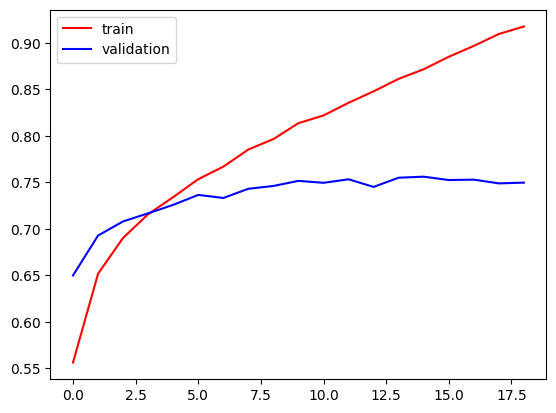

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

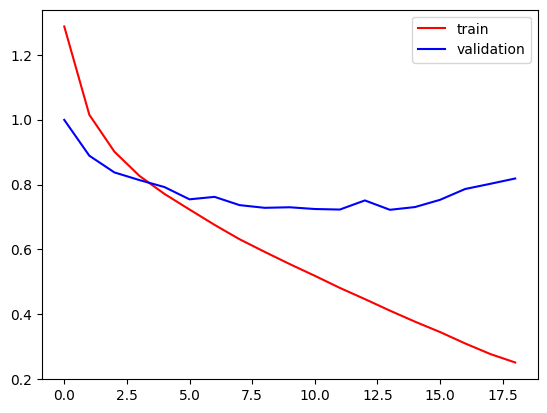

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()